# Scatterplots, Correlation, and Regression

In this lab, we're going to cover some basic modeling, data visualization, and reporting functions. 

To begin, install the **{modelsummary}** package (if needed) and load it along with **{tidyverse}**.



In [ ]:
install.packages("modelsummary") # this will help us generate attractive regression output later

In [2]:
library(tidyverse)
library(modelsummary)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
`modelsummary` 2.0.0 now uses `tinytable` as its default table-drawing
  backend. Learn more at: https://vincentarelbundock.github.io/tinytable/

Revert to `kableExtra` for one session:

  options(modelsummary_factory_default = 'kableExtra')
  options(modelsummary_factory_latex = 'kableExtra')
  options(modelsummary_factory_html = 'kableExtra')

Silence this message forever:

  config_modelsummary(startup_message = FALSE)



## Simulated data

Let's start by simulating some fake data. Simulated data has wonderful properties for learning regression and other methods, namely, we can control the extent to which our data aligns with the assumptions utilized by the estimator. We also know the population parameters ($b$ and $se$) because we created the data.

Start with a random variable, *x*. 


In [3]:
# run the set.seed() function if you would like to be able to reproduce 
# the results I have below. You could use a different seed number 
# and then generate your own results with different random draws.

set.seed(5)

# this function draws 100 random values from a uniform distribution between 0 and 50

xvar <- runif(n = 100, min = 0, max = 50)

# now create the outcome variable yvar as a linear function of xvar.
# where does the rest of this equation come from?

yvar <- 32 - 1.2*xvar + rnorm(n = 100, mean = 0, sd = 30)

# combine new vectors into a data frame using data.frame or tibble
# alternatively, we could have used the cbind() function "column bind"

fake <- tibble(xvar, yvar)

# look at your data: 
head(fake)

xvar,yvar
<dbl>,<dbl>
10.010723,63.884590
34.260930,-3.481333
45.843789,7.648139
14.219973,-2.819012
5.232506,22.354973
35.052873,-37.812040


## A basic scatterplot

We can use the *plot()* function in base R to take a quick look at the relationship between *xvar* and *yvar*.

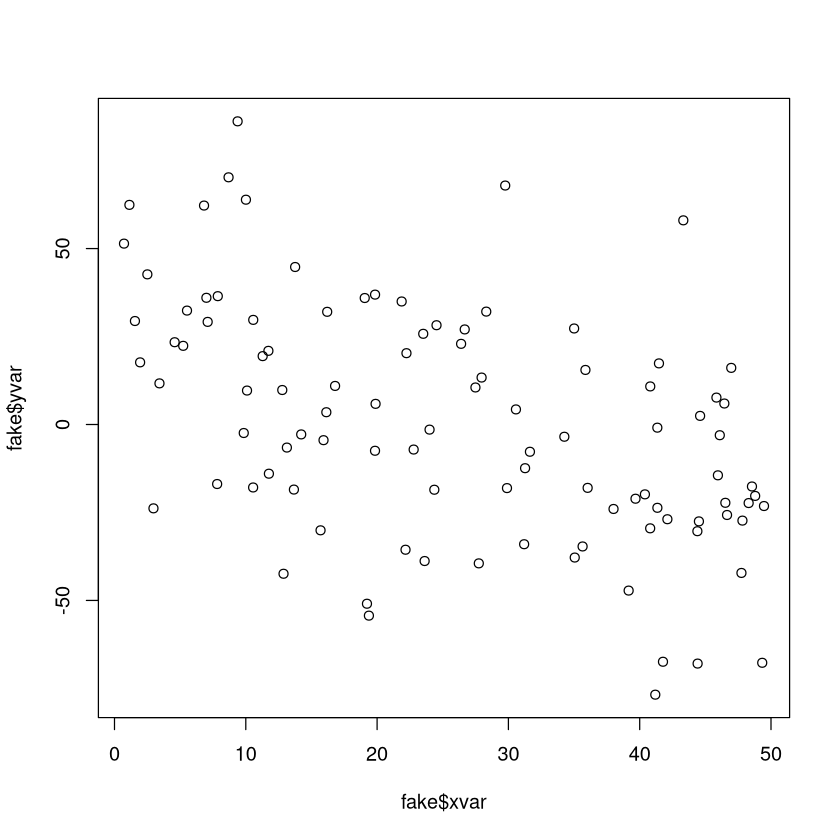

In [4]:
plot(fake$xvar, fake$yvar) # note that x variable goes first, y variable second

This plot matches what we told R we wanted - a predictor variable between 0 and 50, an outcome variable that is a linear function of x, and a negative relationship between the two variables with substantial random error. 

## Covariance and Correlation

The *cov()* and *cor()* functions calculate covariance and correlation, respectively. *cor.test()* provides some additional output for hypothesis testing. 

In [5]:
# get the covariance between xvar and yvar

cov(fake$xvar, fake$yvar) 

# correlation

cor(fake$xvar, fake$yvar) # default method is pearson's r

# correlation + significance test 

cor.test(fake$xvar, fake$yvar)

[1] -254.1427

[1] -0.5012702


	Pearson's product-moment correlation

data:  fake$xvar and fake$yvar
t = -5.7349, df = 98, p-value = 1.084e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6351521 -0.3381454
sample estimates:
       cor 
-0.5012702 


Is $Cor(X,Y)$ statistically significant? How can you tell? Answer this question in your Quarto document when you submit the lab.

## Regression 

The *lm* function (for **l**inear **m**odels) in base R can be used to run classic OLS regression models. Note that by default, running *lm* does not generate very useful output in the console. We are better off storing regression model results and then calling them up in other functions, like *summary()*. We can also use the **{modelsummary}** package for nicely formatted default output.

In [13]:
lm(fake$yvar ~ fake$xvar)


Call:
lm(formula = fake$yvar ~ fake$xvar)

Coefficients:
(Intercept)    fake$xvar  
     29.091       -1.108  


This output is limited. Now try:

In [14]:
m1 <- lm(fake$yvar ~ fake$xvar)

# or you could do:
m1 <- lm(yvar ~ xvar, data = fake)

summary(m1)


Call:
lm(formula = yvar ~ xvar, data = fake)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.939 -15.965  -0.785  21.349  76.938 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  29.0906     5.7940   5.021 2.31e-06 ***
xvar         -1.1082     0.1932  -5.735 1.08e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.12 on 98 degrees of freedom
Multiple R-squared:  0.2513,	Adjusted R-squared:  0.2436 
F-statistic: 32.89 on 1 and 98 DF,  p-value: 1.084e-07


That is better. We actually get uncertainty estimates and significance tests along with our coefficient estimates.

Now try out the *modelsummary()* function. (Check out the help file for more info on various arguments you can utilize).

In [15]:
# the output  = "jupyter" format is for visualization in this notebook. 
# you can skip the argument altogether or choose "html". 
modelsummary(m1) 


+-------------+----------+
|             | (1)      |
+=============+==========+
| (Intercept) | 29.091   |
+-------------+----------+
|             | (5.794)  |
+-------------+----------+
| xvar        | -1.108   |
+-------------+----------+
|             | (0.193)  |
+-------------+----------+
| Num.Obs.    | 100      |
+-------------+----------+
| R2          | 0.251    |
+-------------+----------+
| R2 Adj.     | 0.244    |
+-------------+----------+
| AIC         | 962.0    |
+-------------+----------+
| BIC         | 969.8    |
+-------------+----------+
| Log.Lik.    | -478.016 |
+-------------+----------+
| F           | 32.889   |
+-------------+----------+
| RMSE        | 28.82    |
+-------------+----------+ 

Again, such functionality works pretty well. But we can do even better! Let's now add some additional functionality. The code below changes the name of the coefficient for `xvar` and changes the format of the presentation of coefficient and uncertainty estimates. You can see many examples of the additional functionality in `modelsummary` from [the package website](https://modelsummary.com/vignettes/modelsummary.html).

In [16]:
modelsummary(m1,
    stars = TRUE,                   # star significant coefficients
    estimate = "{estimate}{stars}", # defines what to present in the estimate row (usually coefs)
    statistic = "({std.error})")    # defines what to present in the statistic row (usually standard errors)


+-------------+-----------+
|             | (1)       |
+=============+===========+
| (Intercept) | 29.091*** |
+-------------+-----------+
|             | (5.794)   |
+-------------+-----------+
| xvar        | -1.108*** |
+-------------+-----------+
|             | (0.193)   |
+-------------+-----------+
| Num.Obs.    | 100       |
+-------------+-----------+
| R2          | 0.251     |
+-------------+-----------+
| R2 Adj.     | 0.244     |
+-------------+-----------+
| AIC         | 962.0     |
+-------------+-----------+
| BIC         | 969.8     |
+-------------+-----------+
| Log.Lik.    | -478.016  |
+-------------+-----------+
| F           | 32.889    |
+-------------+-----------+
| RMSE        | 28.82     |
+-------------+-----------+ 

Now let's clean up the text of the table and get rid of unnecessary goodness-of-fit statistics. In the code chunk below, we change the name of `xvar` to "X (simulated)" and only keep the number of observations, the $R^2$ score, and the RMSE. 

In [17]:
# create a list that defines the order and name of the coef estimates.
cmap <- c("xvar" = "X (simulated)",   # both estimates will be renamed and X will  
          "(Intercept)" = "Constant") #   listed first

modelsummary(m1,
    stars = TRUE,                   
    estimate = "{estimate}{stars}", 
    statistic = "({std.error})",
    coef_map = cmap,                          # calls up our saved list
    gof_map = c("nobs", "r.squared", "rmse")) # selects just these three statistics    


+---------------+-----------+
|               | (1)       |
+===============+===========+
| X (simulated) | -1.108*** |
+---------------+-----------+
|               | (0.193)   |
+---------------+-----------+
| Constant      | 29.091*** |
+---------------+-----------+
|               | (5.794)   |
+---------------+-----------+
| Num.Obs.      | 100       |
+---------------+-----------+
| R2            | 0.251     |
+---------------+-----------+
| RMSE          | 28.82     |
+---------------+-----------+ 

Ok, now let's add a naive model without our predictor variable. We first run (and store) the model, and then add it to our table.

In [18]:
m0 <- lm(yvar ~ 1, data = fake)

modelsummary(list(m0, m1),           # includes two models: m0 and m1
    stars = TRUE,                   
    estimate = "{estimate}{stars}", 
    statistic = "({std.error})",
    coef_map = cmap,                
    gof_map = c("nobs", "r.squared", "rmse"))   


+---------------+---------+-----------+
|               | (1)     | (2)       |
+===============+=========+===========+
| X (simulated) |         | -1.108*** |
+---------------+---------+-----------+
|               |         | (0.193)   |
+---------------+---------+-----------+
| Constant      | 0.363   | 29.091*** |
+---------------+---------+-----------+
|               | (3.348) | (5.794)   |
+---------------+---------+-----------+
| Num.Obs.      | 100     | 100       |
+---------------+---------+-----------+
| R2            | 0.000   | 0.251     |
+---------------+---------+-----------+
| RMSE          | 33.31   | 28.82     |
+---------------+---------+-----------+ 

### Predictions and residuals

You can generate predictions (and, obviously, residuals) in many ways: through built in functions in base R as well as generating the predictions yourself by accessing stored model results. 

In [19]:
# add our predicted values of y and residuals to the data frame

fake <- fake |> mutate(yhat1.m1 = fitted(m1),
                       resid1.m1 = resid(m1))

# now let's create the vars ourselves using stored model results:

#m1$coefficients is a vector containing our regression coefficients

fake$yhat2.m1 <- m1$coefficients["(Intercept)"] + m1$coefficients["xvar"]*xvar
fake$resid2.m1 <- fake$yvar - fake$yhat2.m1 

head(fake)

xvar,yvar,yhat1.m1,resid1.m1,yhat2.m1,resid2.m1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10.010723,63.884590,17.99645,45.8881372,17.99645,45.8881372
34.260930,-3.481333,-8.87819,5.3968576,-8.87819,5.3968576
45.843789,7.648139,-21.71458,29.3627231,-21.71458,29.3627231
14.219973,-2.819012,13.33166,-16.1506761,13.33166,-16.1506761
5.232506,22.354973,23.29178,-0.9368102,23.29178,-0.9368102
35.052873,-37.812040,-9.75584,-28.0561999,-9.75584,-28.0561999


Our two `yhat` and `resid` variables are the same, so the built-in `fitted()` and `resid()` functions match what we can do by specifying the simple linear equation using the coefficient estimates stored from `m1`.

### A note on Quarto and regression tables

When you create pdf tables in Quarto, you are using the functionality of two additional pieces of software, Pandoc and LaTeX. Both software is open-source. Pandoc converts your Markdown text to other file formats. LaTeX is a type-setting software widely used in research projects to create pdf documents. Both software packages are complex and - shall we say - quirky. I hope that for most of your work, Pandoc will simply remain working in the background with little need for you to intervene. LaTeX will probably cause more issues for you, and you may need to research LaTeX commands and packages in order to get your pdf output to look exactly like what you want. If you are seeing html output from Quarto that throws errors when you try to convert to pdf, it is probably an issue with Quarto speaking (through Pandoc) to the LaTeX pdf enginges. 

But enough of that for now. `modelsummary()` output should work in Quarto, pushed to pdf, for the most part. Include your table above, this time inside of an r code chunk in your Quarto document. Notice that in the example below, I'm include some code chunk options for automatic labeling of the table and controlling the caption (title) and placement. The `echo` argument will surpress the code. `label` creates a crossreference than can be linked in your Quarto document using the `@tbl-reg1` tag, and the other two arguments specify the title and its placement. The asterisks in the title are Markdown syntax for creating italicizing text. What happends if you use two asterisks instead of one on each side of the title? 

```r
#| echo: false
#| label: tbl-reg1
#| tbl-cap: "*X and Y, OLS Results*"
#| tbl-cap-location: bottom

modelsummary(list(m0, m1),           
    stars = TRUE,                   
    estimate = "{estimate}{stars}", 
    statistic = "({std.error})",
    coef_map = cmap,                
    gof_map = c("nobs", "r.squared", "rmse"))   
```

## Linear fitted regression lines with scatterplots.

Let's revisit our original scatterplot:

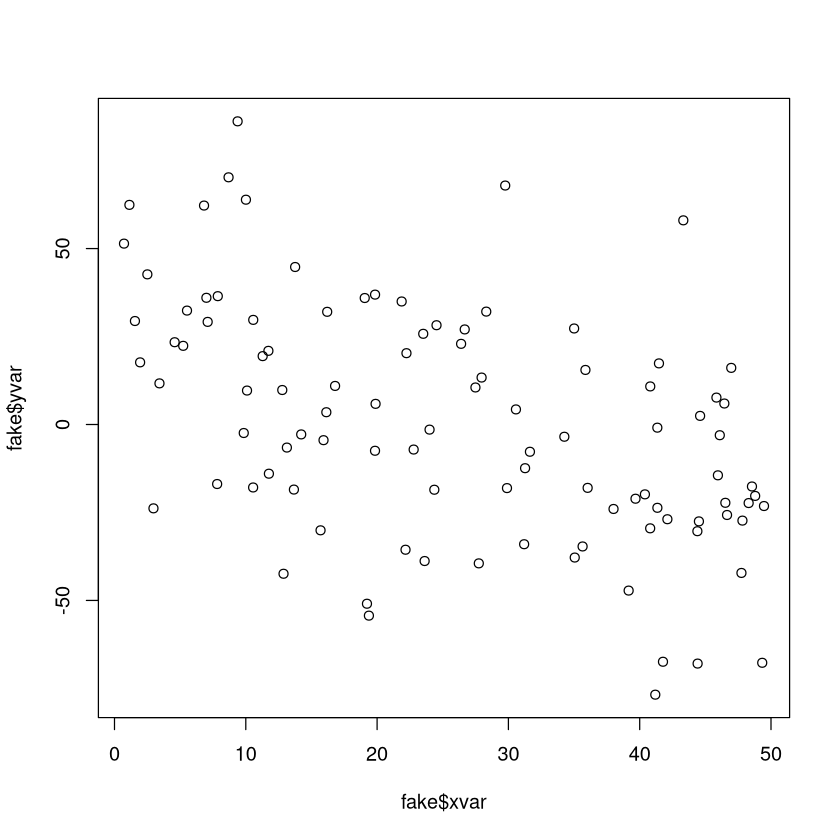

In [20]:
plot1 <- plot(fake$xvar, fake$yvar)

## **ggplot2**

*ggplot()* is a data visualization system built into **tidyverse**. It is very powerful, but as in true R fashion, clunky and frankly weird. Let's learn just a bit of basics by replicating our scatterplot. 

We'll do a bunch in ggplot, so it is better to start learning the code structure now. Check out these resources:

1. R for Data Science, [data viz chapter](https://r4ds.hadley.nz/data-visualize.html). 
2. [ggplot reference guide and cheat sheets](https://ggplot2.tidyverse.org/index.html).
3. [R for Graphics Cookbook](https://r-graphics.org/) (with some simple examples).

First, create an empty canvas for your graph using the *ggplot()* function. We'll specify the data argument to select the data.frame. 

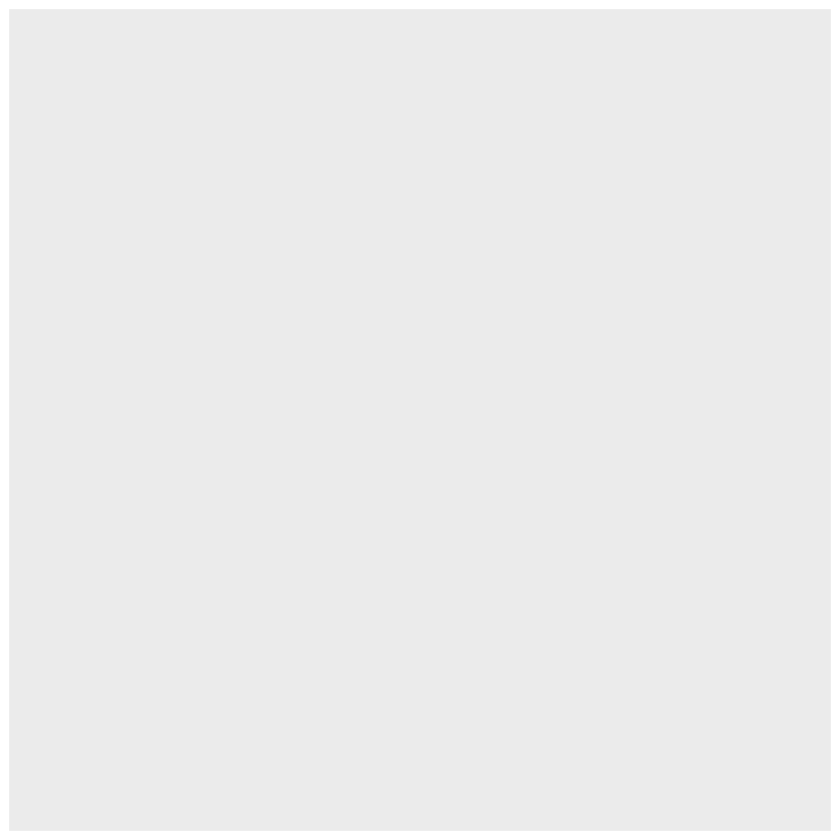

In [21]:
ggplot(data = fake)

Good. The function worked. But there isn't anything there! That's because we need to "map" elements of the graph to this canvas. 

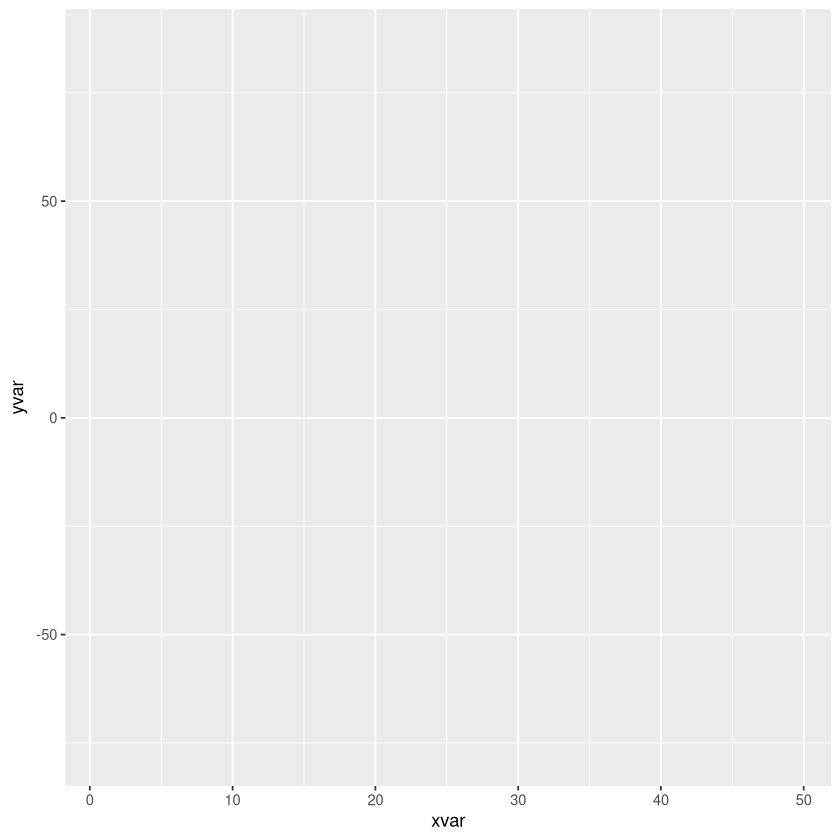

In [22]:
# I think the "mapping" and "aes" names are strange. "aes" stands 
# for "aesthetics", which might make a little more sense.

ggplot(data = fake, mapping = aes(x = xvar, y = yvar))


Also good. Now we have a graph with x and y dimensions, appropriately scaled to our two variables. But still no data! We can add them with various *geom_* calls to this canvas. You might find it useful to store this original canvas and then add stuff to it in additional commands, or you could do the whole thing in one long run-on command. 

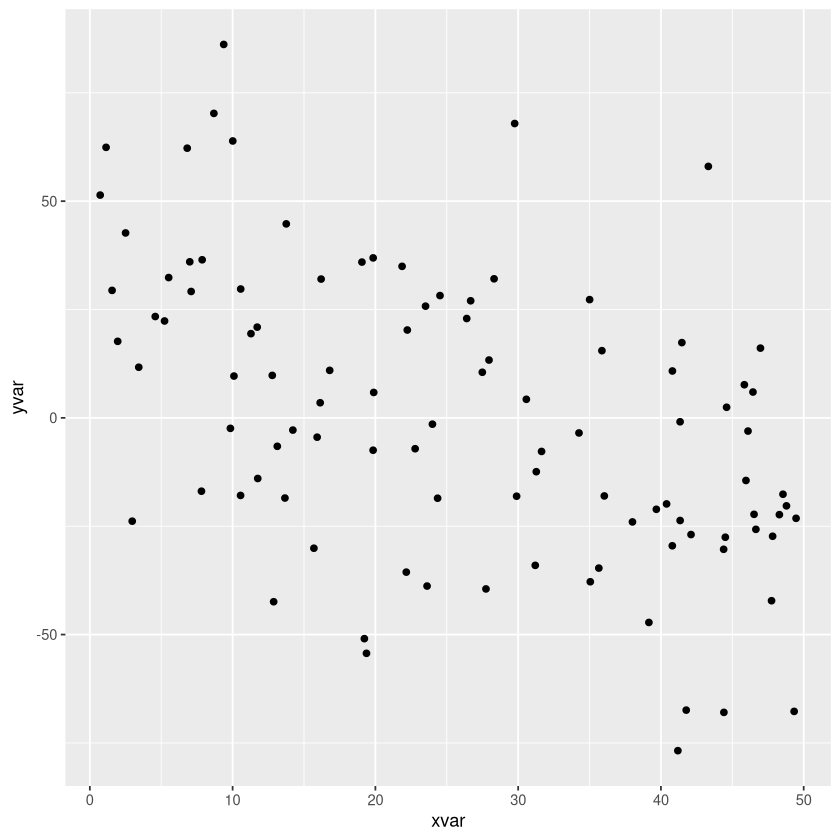

In [23]:
p1 <- ggplot(data = fake, mapping = aes(x = xvar, y = yvar))

p1 + geom_point()

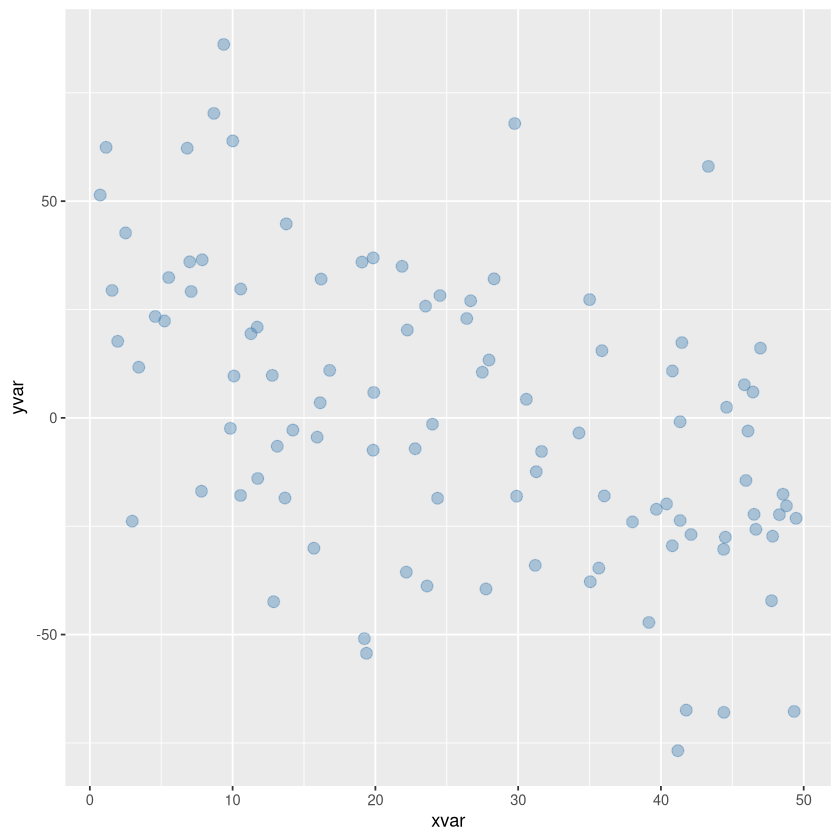

In [24]:
# alpha adjusts the transparency, size adjusts the size of the dot,
# and color does, well, you see it. you can also type color() in 
# the console to see the names R knows about it. 

# modern R GUIs will give you a little thumbnail of the color. Nice!
# You could specify color using RGB or HEX codes as well.
p1 + geom_point(alpha = .4, size = 3, color = "steelblue")

Now, let's add in our simple regression line using the *geom_smooth()* function and save it as p2. 

`geom_smooth()` using formula = 'y ~ x'


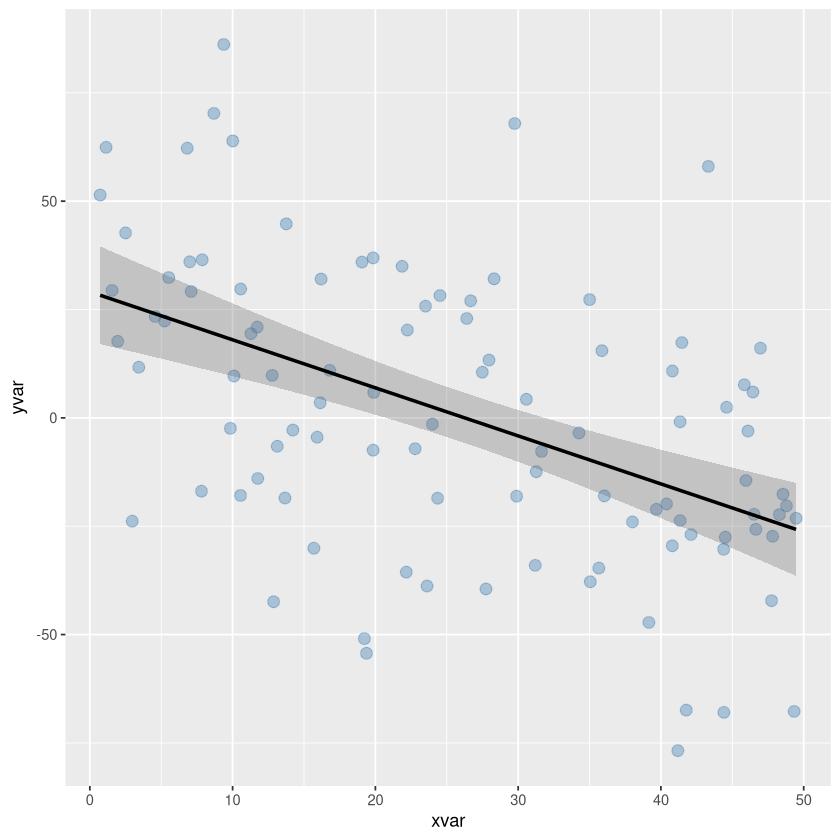

In [25]:
p2 <- p1 + geom_point(alpha = .4, size = 3, color = "steelblue") +
       geom_smooth(method = "lm", fill="grey40", color = "black", alpha = .3) 

# to view, just type: 
p2        

Let's superimpose a loess smoother on top of our existing *p2* plot and add some labels and a title. 

`geom_smooth()` using formula = 'y ~ x'


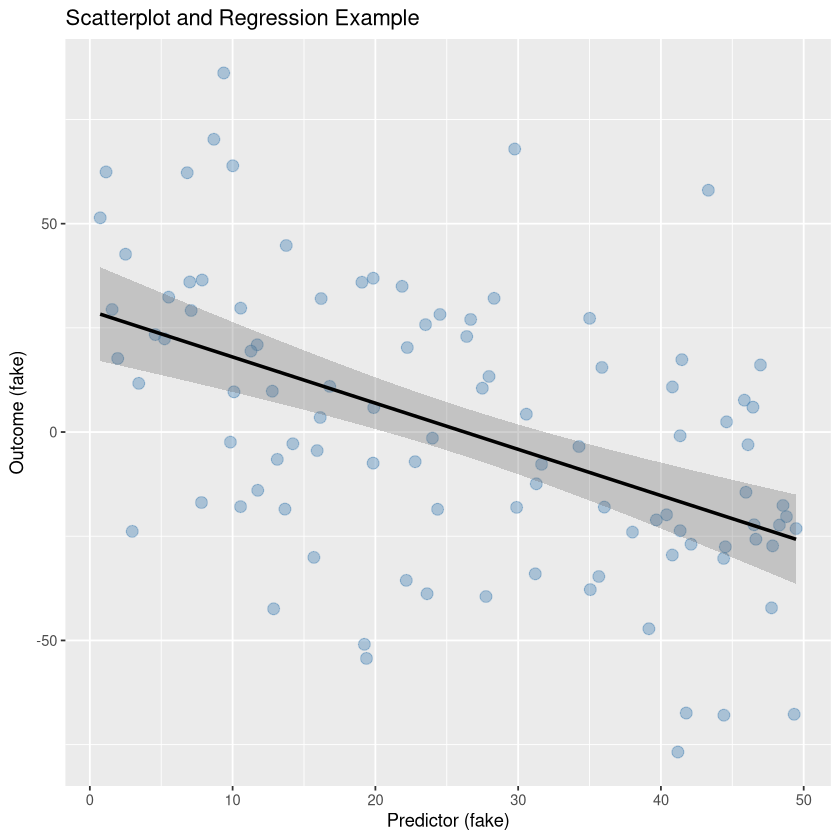

In [27]:
p2 + labs(
        title = "Scatterplot and Regression Example",
        x = "Predictor (fake)",
        y = "Outcome (fake)"
    ) 

In the example above, we separated out the layers of the graph. But you could also include all the elements we did in one large function call by omitting the assignment to `p1` and `p2` and simply link the graph elements together using `+`. 